In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
iris = load_iris()
X = iris.data  # 4 đặc trưng
y = iris.target
X_binary = iris.data[:100, :2]  
y_binary = iris.target[:100]
print("Kích thước dữ liệu đầy đủ:", X.shape, y.shape)
print("Kích thước dữ liệu nhị phân:", X_binary.shape, y_binary.shape)

Kích thước dữ liệu đầy đủ: (150, 4) (150,)
Kích thước dữ liệu nhị phân: (100, 2) (100,)


In [22]:
# 1. Perceptron Learning Algorithm (PLA)
def perceptron(X, y, eta=1, max_iter=1000):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(max_iter):
        misclassified = False
        for i in range(len(X)):
            if y[i] * (np.dot(w, X[i]) + b) <= 0:
                w += eta * y[i] * X[i]
                b += eta * y[i]
                misclassified = True
        if not misclassified:
            break
    return w, b

y_binary_pla = y_binary * 2 - 1
w, b = perceptron(X_binary, y_binary_pla)
print("\nPLA - Trọng số:", w)
print("PLA - Bias:", b)


PLA - Trọng số: [  79.8 -101.4]
PLA - Bias: -126


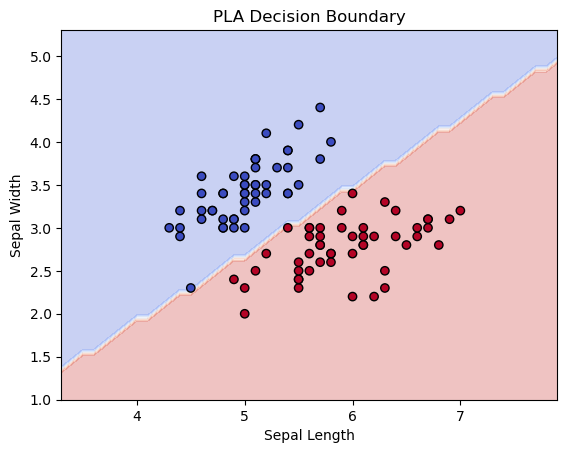

In [23]:
def plot_decision_boundary_pla(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('PLA Decision Boundary')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

plot_decision_boundary_pla(X_binary, y_binary, w, b)

In [24]:
# 2. Logistic Regression
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
log_reg = LogisticRegression(C=1.0)  # C=1.0 là regularization vừa phải
log_reg.fit(X_train_bin, y_train_bin)

LogisticRegression()

In [25]:
train_acc_log = accuracy_score(y_train_bin, log_reg.predict(X_train_bin))
test_acc_log = accuracy_score(y_test_bin, log_reg.predict(X_test_bin))
print("\nLogistic Regression - Train Accuracy:", train_acc_log)
print("Logistic Regression - Test Accuracy:", test_acc_log)
print("Trọng số:", log_reg.coef_)
print("Bias:", log_reg.intercept_)


Logistic Regression - Train Accuracy: 1.0
Logistic Regression - Test Accuracy: 1.0
Trọng số: [[ 2.88998626 -2.72779317]]
Bias: [-7.09121494]


In [26]:
def plot_decision_boundary_logreg(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

In [27]:
# 3. Softmax Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
softmax_reg = LogisticRegression(multi_class='multinomial', C=1.0, max_iter=200)
softmax_reg.fit(X_train, y_train)

c:\Users\bitho\anaconda3\envs\torch-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [28]:
train_acc_softmax = accuracy_score(y_train, softmax_reg.predict(X_train))
test_acc_softmax = accuracy_score(y_test, softmax_reg.predict(X_test))
print("\nSoftmax Regression - Train Accuracy:", train_acc_softmax)
print("Softmax Regression - Test Accuracy:", test_acc_softmax)
print("Trọng số:", softmax_reg.coef_)
print("Bias:", softmax_reg.intercept_)


Softmax Regression - Train Accuracy: 0.975
Softmax Regression - Test Accuracy: 1.0
Trọng số: [[-0.39381194  0.96219532 -2.37519619 -0.99872802]
 [ 0.50856037 -0.25478313 -0.21286405 -0.77577655]
 [-0.11474843 -0.70741219  2.58806024  1.77450457]]
Bias: [  9.01151051   1.86772016 -10.87923067]


In [29]:
# 4. Kiểm tra Overfitting
softmax_reg_strong = LogisticRegression(multi_class='multinomial', C=0.01, max_iter=200)
softmax_reg_strong.fit(X_train, y_train)

c:\Users\bitho\anaconda3\envs\torch-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.01, max_iter=200, multi_class='multinomial')

In [30]:
train_acc_strong = accuracy_score(y_train, softmax_reg_strong.predict(X_train))
test_acc_strong = accuracy_score(y_test, softmax_reg_strong.predict(X_test))
print("\nSoftmax Regression (C=0.01) - Train Accuracy:", train_acc_strong)
print("Softmax Regression (C=0.01) - Test Accuracy:", test_acc_strong)
print("Chênh lệch Train-Test (C=1.0):", train_acc_softmax - test_acc_softmax)
print("Chênh lệch Train-Test (C=0.01):", train_acc_strong - test_acc_strong)


Softmax Regression (C=0.01) - Train Accuracy: 0.875
Softmax Regression (C=0.01) - Test Accuracy: 0.9333333333333333
Chênh lệch Train-Test (C=1.0): -0.025000000000000022
Chênh lệch Train-Test (C=0.01): -0.05833333333333335
